#  <center><u>**`NEAREST NEIGHBHOUR`**</u></center>

The `k-nearest neighbors (KNN) algorithm` is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve `both classification and regression problems`. However, it is more widely used in classification problems in the industry


`K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category       that is most similar to the available categories.This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.`

`K-NN is a **non-parametric algorithm**, which means it does not make any assumption on underlying data.`
`It is also called a **lazy learner algorithm** because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset i.e it classifies that data into a category that is much similar to the new data.`

Example: Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.


![image.png](attachment:image.png)




# **`WATCH ALL VIDEOS IN THE PORTAL`**

## **`Watch Video 1 : KNN theory`**

## **`Watch Video 2: KNN Implementation`**

File used: https://drive.google.com/file/d/1BWXHmmAHJc5iSdwh7jubLsL591MJh2Lo/view?usp=sharing

In [1]:
# Import usefull python modules(pandas, numpy, pyplot)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# import datasets, neighbors, metrics from sklearn
from sklearn import datasets,neighbors

# import ListedColormap from matplotlib, import warnings
from matplotlib.colors import ListedColormap
import warnings
from sklearn import metrics


warnings.filterwarnings("ignore")




Now we will write a function named knn_comparison to check knn on different set of data with different k values.

Since we need to use this process repeatedly, its always better to write a function. This function uses 2 parameters, data and n_neighbours

So what are we waiting for, lets start creating your function.

this function would use few python functions like:

1. ListedColormap which will make a list of given colors
Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html#matplotlib.colors.ListedColormap
    
2. x.ravel() will give a flatten array

3. np.c_ : Translates slice objects to concatenation along the second axis.
   
   np.c_[np.array([1,2,3]), np.array([4,5,6])]
   
   array([[1, 4],[2, 5],[3, 6]])   (source: np.c_ documentation)
   
4. pcolormesh will plot the (xx,yy) grid with colors according to the values of Z, so that it looks like decision boundry.
Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html

Also we are going to write a plotting code which uses Meshgrid to know how different k values varies 

### Meshgrid explanation
![title](demo_data/meshgrid_image.png)
please check this link <a href='https://stackoverflow.com/a/36014586'> stackoverflow meshgrid explanation </a>

## Creating KNN function

    This function finds k-NN and plots the data.


<p style='text-align: right;'> 55 points</p>


In [2]:
def knn_comparison(data, n_neighbors = 15):
    
#     define X and y where X having first 2 columns and y has last or 3rd column. Hint: Use slicing
    X =  data [:,:2]
    y = data [:,2]
    
    h = .02  # step size in the mesh (grid cell size)   
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF']) #having light colors
    cmap_bold = ListedColormap(['#FF0000', '#0000FF']) # having above matching shades of dark colors
    
    '''the core classifier: k-NN'''
    
    clf = neighbors.KNeighborsClassifier(n_neighbors)   #initialise KNN classifier with n_neighbors as its parameters
    clf.fit(X,y)# fit the KNN with X and y

#   Get  minimum value-1 and maximum value+1 from X's 0th column 
    x_min, x_max = X[:,0].min()-1 , X[:,0].max() +1 
    
    # Get  minimum value-1 and maximum value+1 from X's 1th column 
    y_min, y_max = X[:,1].min()-1 , X[:,1].max() +1 
    
    '''
    
    we create a mesh grid (x_min,x_max) and (y_min y_max) with 0.02 grid spaces.
    which you defined already in h variable.
    
    Hint: Use numpy meshgrid function : https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
    
    ''' 
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h)) 
    
    ''' we predict the value (either 0 or 1) of each element in the grid
        Hint: Use numpy c_ function to read xx and yy with ravel function on it.
        Reference: https://numpy.org/doc/stable/reference/generated/numpy.c_.html
    '''
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

    # convert the output back to the xx shape as we need it to plot the decision boundry)
    Z = Z.reshape(xx.shape)
    
    '''Now lets plot our descision boudries using pcolormesh function
        Hint : use xx, yy, Z and cmap as cmap_light
    '''
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

    # scatter plot of with given points i.e having 1st and 2nd columns of X, c as y and cmap as cmap_bold
    plt.scatter(X[:,0],X[:,1], c=y,cmap=cmap_bold)
    
    #defining scale on both axises with x limited to xx's min and max values and y limited to yy'ss min and max values
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    # set the title as K values = n_neighbors
    plt.title('K value ='+str(n_neighbors))
    
    plt.show()

Super!You did a great job. Your function made rest of the things easy for you to know how KNN works. 

Now lets check this function on different set of data and n values

Please check your canvas account to download all dataset used here.

Hey Hey! remember, you need to use numpy genfromtext function to read data this time and not the pandas read_csv function.
Don't worry its similar to read_csv function. Use delimiter as comma (',')

We have also provided reference on how to use genfromtxt: https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html

## 1. KNN on 1st dataset

<p style='text-align: right;'> 5 points</p>


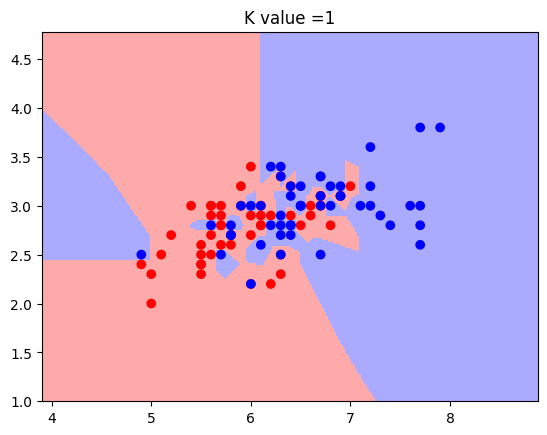

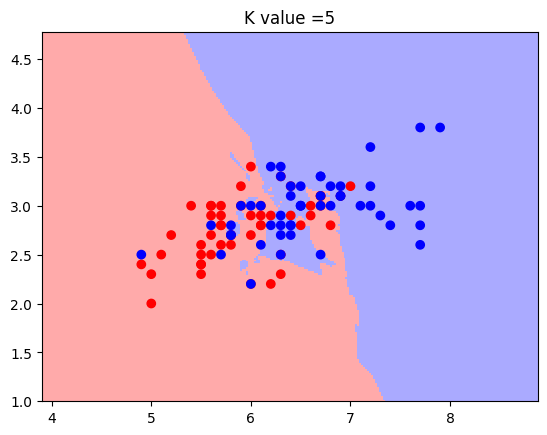

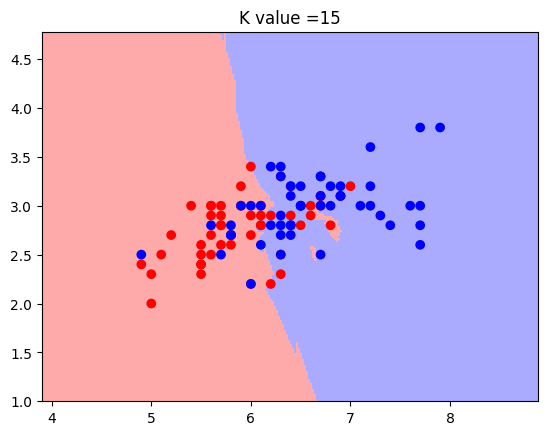

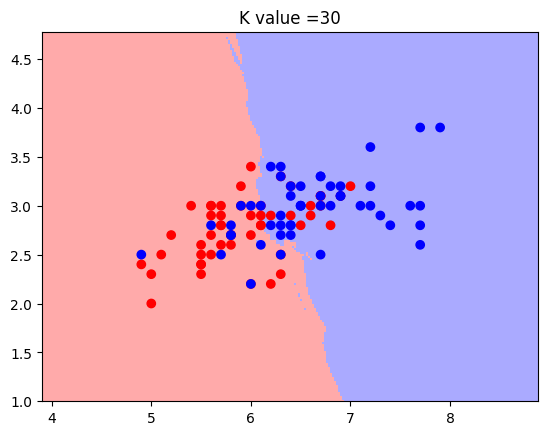

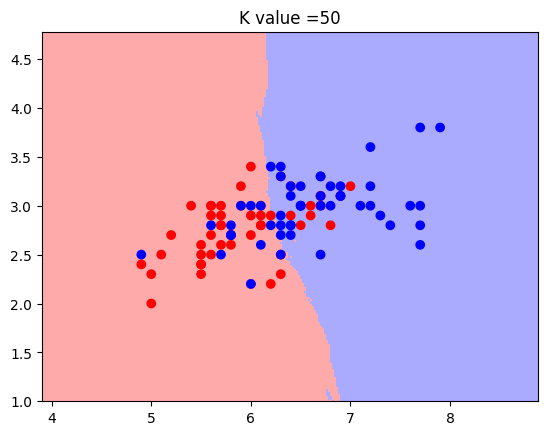

In [3]:
# use genfromtext to load 6.overlap.csv file using delimiter = ','
data = np.genfromtxt('6.overlap.csv',delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,15, 30 and 50
 
knn_comparison(data,1) 
knn_comparison(data,5) 
knn_comparison(data,15) 
knn_comparison(data,30) 
knn_comparison(data,50) 


## **`2. KNN on 2nd dataset`**

<p style='text-align: right;'> 5 points</p>


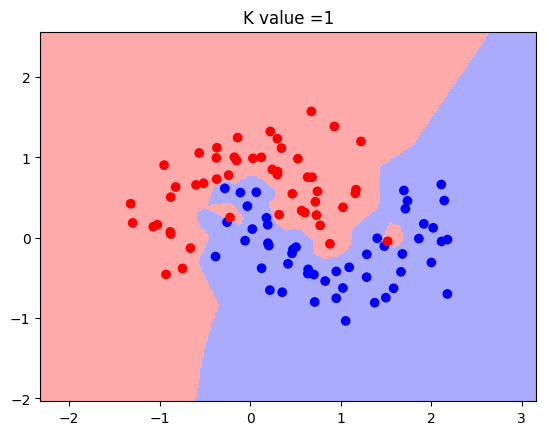

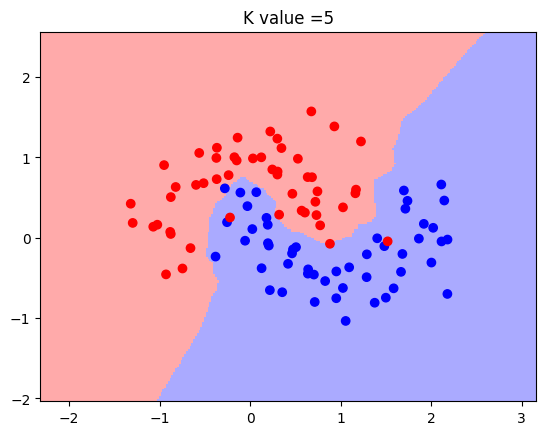

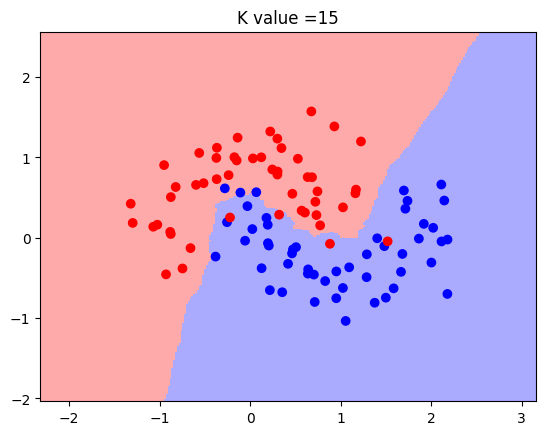

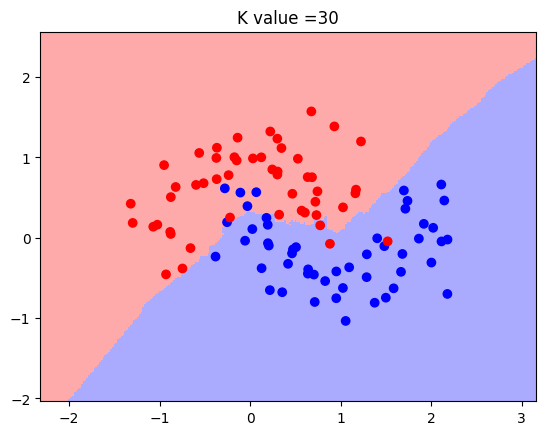

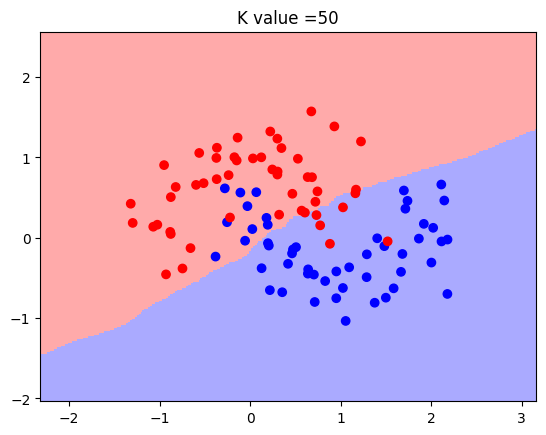

In [4]:
# load 1.ushape.csv data
data = np.genfromtxt('1.ushape.csv',delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,15, 30 and 50
 
knn_comparison(data,1) 
knn_comparison(data,5) 
knn_comparison(data,15) 
knn_comparison(data,30) 
knn_comparison(data,50) 



## **`3. KNN on 3rd dataset`**

<p style='text-align: right;'> 5 points</p>


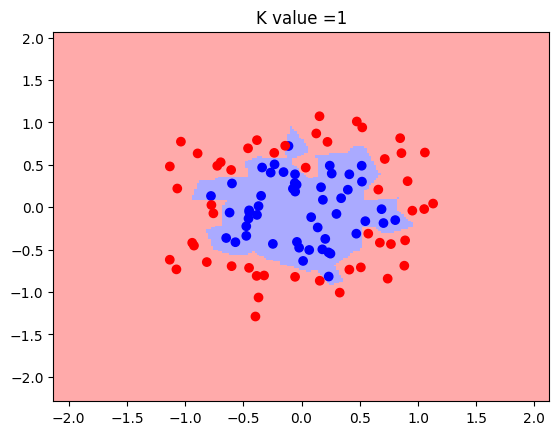

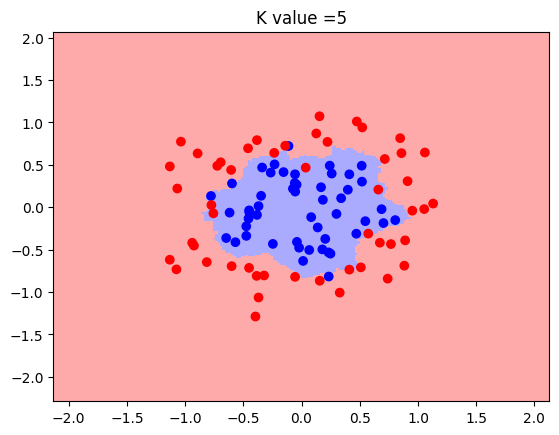

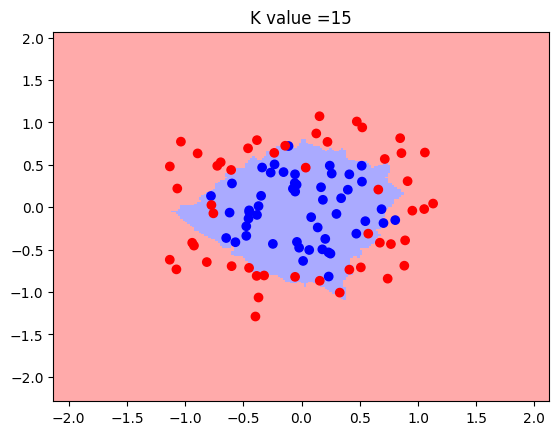

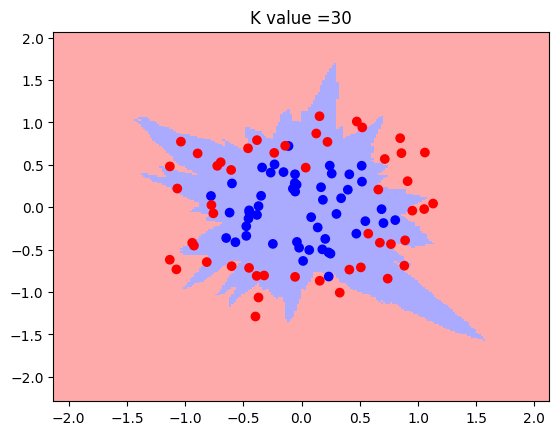

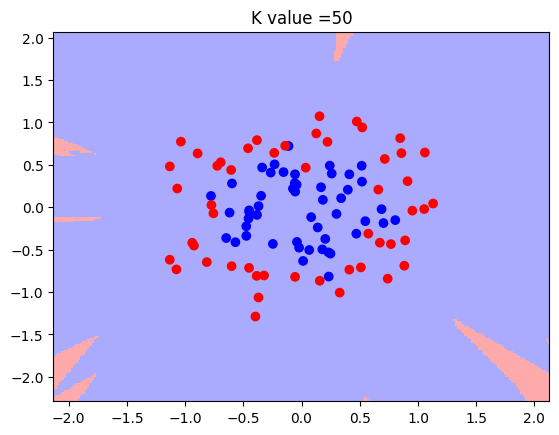

In [5]:
# load 2.concerticcir1.csv data
data = np.genfromtxt('2.concerticcir1.csv',delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,15, 30 and 50
 
knn_comparison(data,1) 
knn_comparison(data,5) 
knn_comparison(data,15) 
knn_comparison(data,30) 
knn_comparison(data,50) 

## **`4. KNN on 4th dataset`**

<p style='text-align: right;'> 5 points</p>


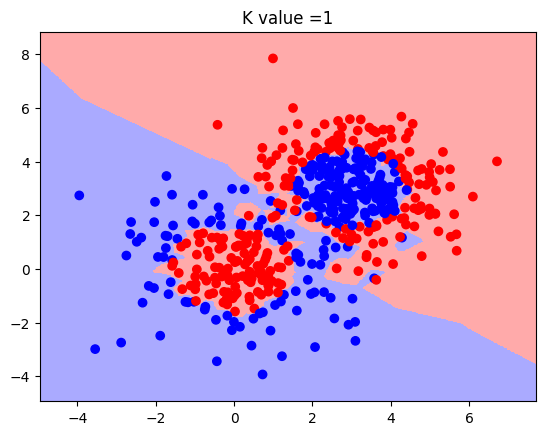

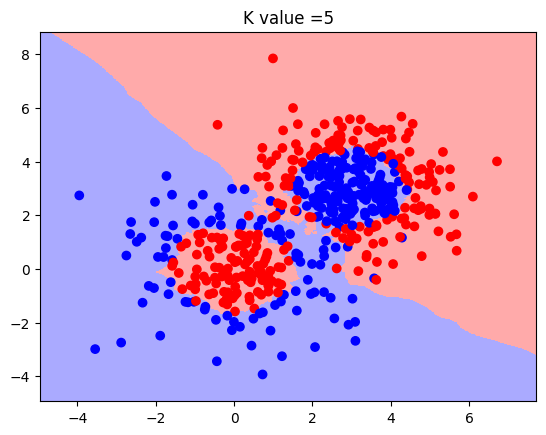

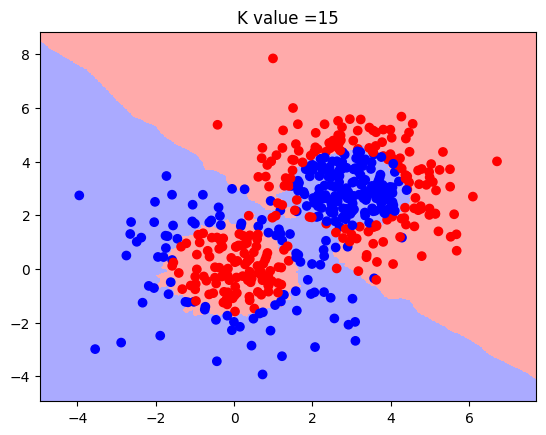

In [6]:
# load 3.concertriccir2.csv data.
data = np.genfromtxt('3.concertriccir2.csv',delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,15, 30 and 50
 
knn_comparison(data,1) 
knn_comparison(data,5) 
knn_comparison(data,15) 


## **`5. KNN on 5th dataset`**

<p style='text-align: right;'> 5 points</p>


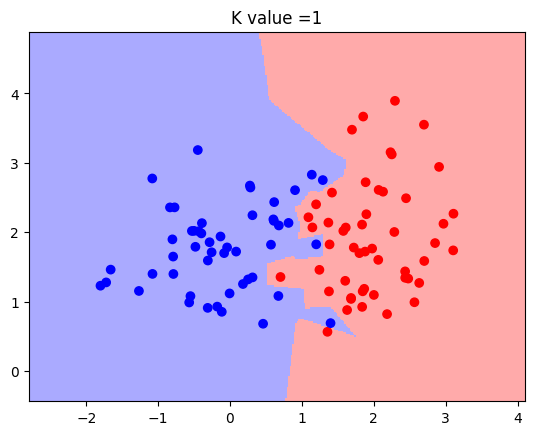

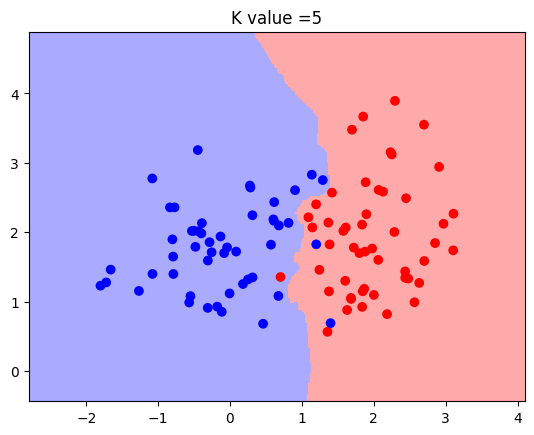

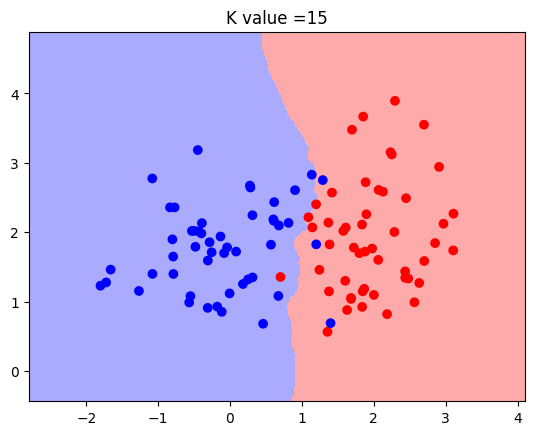

In [7]:
# Load 4.linearsep.csv data
data = np.genfromtxt('4.linearsep.csv',delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,15, 30 and 50
 
knn_comparison(data,1) 
knn_comparison(data,5) 
knn_comparison(data,15) 


## **`6. KNN on 6th dataset`**

<p style='text-align: right;'> 5 points</p>


In [9]:
# Load 5.outlier.csv data
data = np.genfromtxt('5.outlier.csv',delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,15, 30 and 50
 
knn_comparison(data,1) 

KeyboardInterrupt: 

## **`7. KNN on 7th dataset`**

<p style='text-align: right;'> 5 points</p>


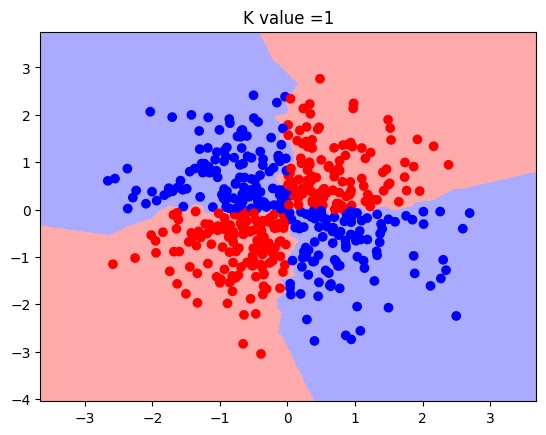

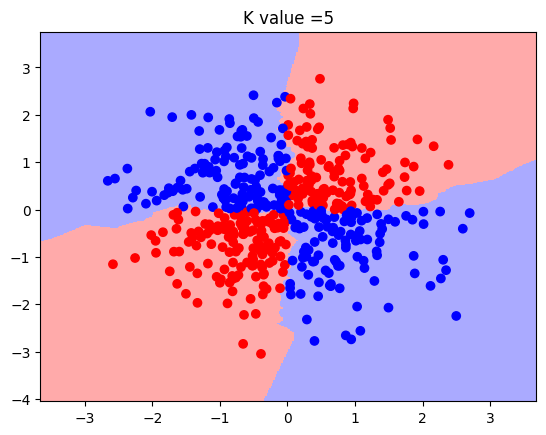

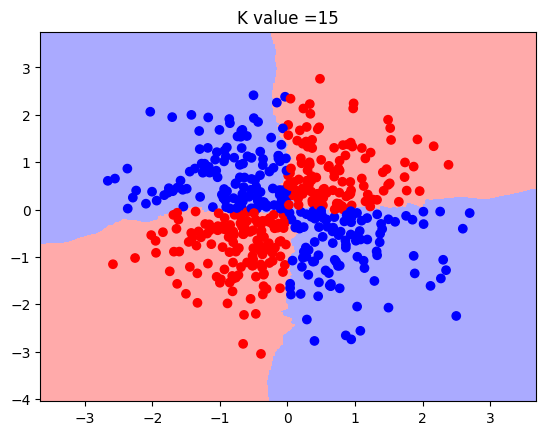

In [10]:
# load demo_data/7.xor.csv
data = np.genfromtxt('7.xor.csv',delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,15, 30 and 50
 
knn_comparison(data,1) 
knn_comparison(data,5) 
knn_comparison(data,15) 



## **`8. KNN on 8th dataset`**

<p style='text-align: right;'> 5 points</p>


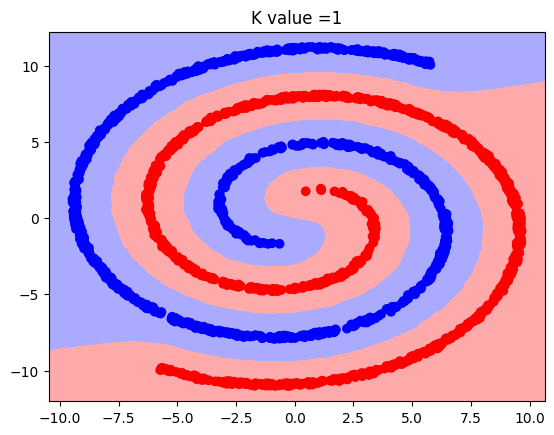

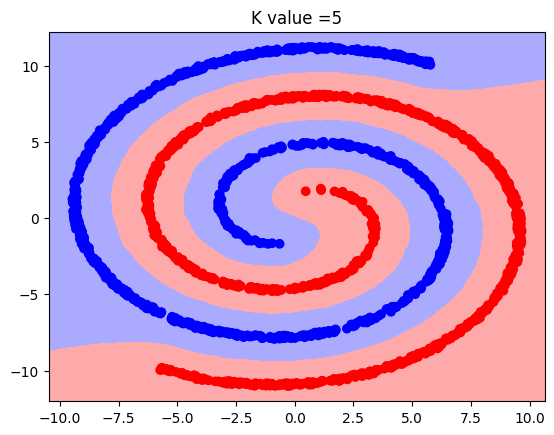

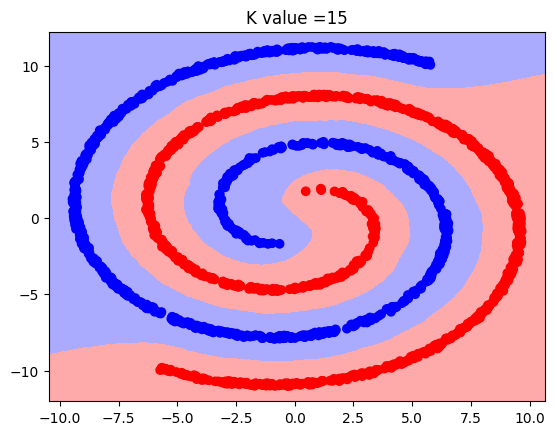

In [11]:
# Load 8.twospirals.csv data
data = np.genfromtxt('8.twospirals.csv',delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,15, 30 and 50
 
knn_comparison(data,1) 
knn_comparison(data,5) 
knn_comparison(data,15) 


## **`9. KNN on 9th dataset`**

<p style='text-align: right;'> 5 points</p>


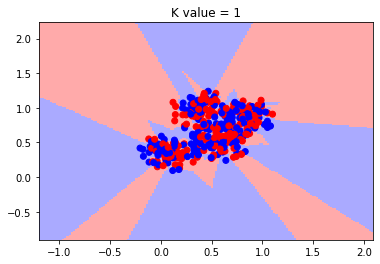

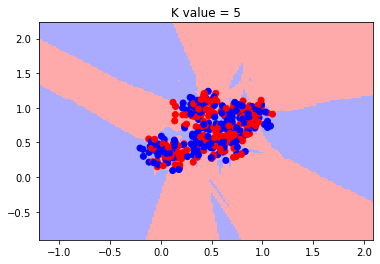

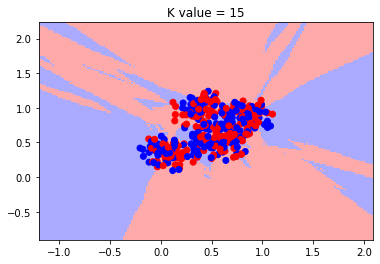

In [ ]:
# Load 9.random.csv data
data = np.genfromtxt('9.random.csv',delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,15, 30 and 50
 
knn_comparison(data,1) 
knn_comparison(data,5) 
knn_comparison(data,15) 





Wohooo! did you see how different dataset can be grouped based on their similarities. This is the magic of KNN algorithm

If you watch carefully, you can see that the boundary becomes smoother with increasing value of K. With K increasing to infinity it finally becomes all blue or all red depending on the total majority.  The training error rate and the validation error rate are two parameters we need to access different K-value and this is how we can select best suitable k value for our problem statement.

This assignment is meant to give you conceptual clarity on how KNN works. In later assignments you will make use of KNN to solve many problems. So don't loose your excitement while stepping ahead. :)

We hope KNN is super fun for you. 


Hey do you think we will spare you without any good case study to solve! Nope =)


So lets get started....

Download the dataset from here <a href="https://www.kaggle.com/rakeshrau/social-network-ads/download"><button onclick="https://www.kaggle.com/rakeshrau/social-network-ads/download">DataSet</button></a>

We are using the Social network ad dataset (Download). The dataset contains the details of users in a social networking site to find whether a user buys a product by clicking the ad on the site based on their salary, age, and gender.

***Use Case: find whether a user buys a product by clicking the ad***

In [12]:
#Importing of the dataset 

dataset = pd.read_csv('Social_Network_Ads.csv')


#Print variable information on  dataset
dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Data Dict

1. User ID : The ID of the user 
2. Gender: male or female
3. 3Age: The age of the user 
4. EstimatedSalary: The estimate salary of the user
5. Purchased:if Purchase made by a user.

In [13]:
# slicing it into independent and dependent variables
X = dataset.iloc[:,[1,2,3]].values

y = dataset.iloc[:,-1].values



Since our dataset containing character variables we have to encode it using LabelEncoder


In [14]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder


#Instantiate LabelEncoder function
le = LabelEncoder()


#fit and encode the feature which is of object type 
X[:,0] = le.fit_transform(X[:,0])


We are performing a train test split on the dataset. We are providing the test size as 0.20, that means our training sample contains 320 training set and test sample contains 80 test set

In [15]:
# importing train_test_split
from sklearn.model_selection import train_test_split


#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Next, we are doing feature scaling to the training and test set of independent variables for reducing the size to smaller values


In [16]:
# import StandardScaler 
from sklearn.preprocessing import StandardScaler

#Instantiate StandardScaler
sc = StandardScaler()

#fit transform sc on X_train
X_train = sc.fit_transform(X_train)

#Transform scaling on X_test
X_test = sc.transform(X_test)

Now we have to create and train the K Nearest Neighbor model with the training set


In [17]:
#Instantiate KNeighborsClassifier with n_neighbors as 5,  metric as 'minkowski' and p as 2
classifier = neighbors.KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) 

#fitting classifier on training data
classifier.fit(X_train,y_train)



KNeighborsClassifier()

We are using 3 parameters in the model creation. n_neighbors is setting as 5, which means 5 neighborhood points are required for classifying a given point. The distance metric we are using is Minkowski, the equation for it is given below
 
![image.png](attachment:image.png)

As per the equation, we have to select the p-value also.
 
    p = 1 , Manhattan Distance
    p = 2 , Euclidean Distance
    p = infinity , Cheybchev Distance
In our problem, we are choosing the p as 2 (also u can choose the metric as “euclidean”)
Our Model is created, now we have to predict the output for the test set
 

In [18]:
#prediction on X_test 
y_pred = classifier.predict(X_test)


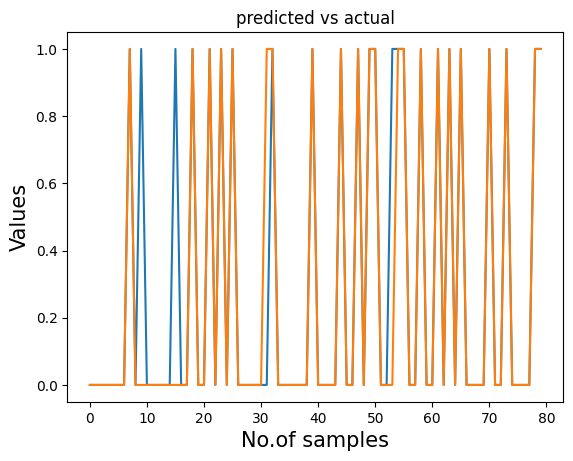

In [21]:
# Comparing true and predicted value using plot

plt.plot(y_pred)
plt.plot(y_test)
plt.title("predicted vs actual")
plt.xlabel("No.of samples",fontsize=15)
plt.ylabel("Values",fontsize=15)
plt.show()

We can evaluate our model using the confusion matrix and accuracy score by comparing the predicted and actual test values



In [22]:
# import confusion_matrix and accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score

#confusion_matrix
cm = confusion_matrix(y_test,y_pred)

#accuracy_score
ac = accuracy_score(y_test,y_pred)


# print accuracy_score and confusion_matrix
print(ac)
print(cm)




0.95
[[55  3]
 [ 1 21]]


Well though our model seems performing really good with 95% accuracy

Can we locate an even better value for K?



In [23]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1,26)

# empty list to append scores
scores = []

# loop through k_range
for k in k_range:
    
    #Initiate KNN with n_neighbors as k
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    #Fitting model on training data
    knn.fit(X_train,y_train)
    
    
    
    #Predict on X_test
    y_pred = knn.predict(X_test)
    
    # We append the scores in the dictionary in list
    scores.append(metrics.accuracy_score(y_test,y_pred ))

    
#print scores
print(scores)


[0.925, 0.925, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.925, 0.9375]


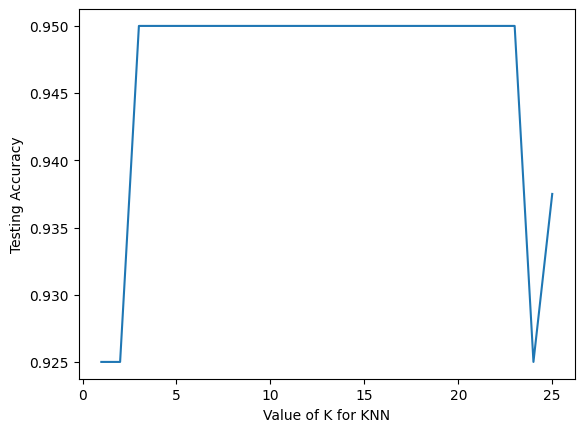

In [24]:
# plot the relationship between K and testing accuracy

plt.plot(k_range,scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")
plt.show()

    Training accuracy rises as model complexity increases
    Testing accuracy penalizes models that are too complex or not complex enough
    For KNN models, complexity is determined by the value of K (lower value = more complex)
    
From above chart you can see that k value after 5 increases the accuracy and same accuracy is maintained till k=13. So our selected k value 5 is perfect for us to solve our problem

Wow! You made the best KNN model. Hurray!

### **`Summary`**
1. The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. 
2. It’s easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.
3. In the case of classification and regression, we saw that choosing the right K for our data is done by trying several Ks and picking the one that works best.
Finally, we looked at an example of how the KNN algorithm could be used in recommender systems, an application of KNN-search.

### **`Conclusion.`**

1. K Nearest Neighbor (KNN) is a very simple, easy-to-understand, and versatile machine learning algorithm. 
2. It’s used in many different areas, such as handwriting detection, image recognition, and video recognition.
3. KNN is most useful when labeled data is too expensive or impossible to obtain, and it can achieve high accuracy in a wide variety of prediction-type problems.
4. KNN is a simple algorithm, based on the local minimum of the target function which is used to learn an unknown function of desired precision and accuracy.

----------------------

# Have cupcake! Congratulations you have done KNN Assignment :)

-------------------------------------

# Its Feedback Time!

We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

**Please fill this feedback form**
 https://zfrmz.in/MtRG5oWXBdesm6rmSM7N

